In [1]:
# import the required packages
import numpy as np
import pandas as pd

# Problem1

## 1. Text Data Preprocessing

### 1.1 Load the Text Data

In [2]:
dat = pd.read_csv('reddit_5.csv')

In [3]:
dat.head()

,text,category
0,This is just an hypothesis on how I imagine an...,soccer
1,"Hey community, I want to get your opinion on w...",snowboarding
2,I have a roubaix road bike with aero bars and ...,triathlon
3,Out of the u17 World Cup winners “top prospect...,soccer
4,A while ago I quit Judo and since then I've da...,judo


In [4]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      5000 non-null   object
 1   category  5000 non-null   object
dtypes: object(2)
memory usage: 78.2+ KB


In [5]:
dat['category'].value_counts()

soccer          1000
snowboarding    1000
triathlon       1000
judo            1000
surfing         1000
Name: category, dtype: int64

### 1.2 Cleanse the Text Data

In [6]:
dat['text'][0]

"This is just an hypothesis on how I imagine an European league, with the relegation of just one team:<lb><lb>**Champions League** is the main league and consists of 20 teams:<lb><lb>(at the time of writing the first 20 teams of UEFA ranking)<lb><lb>* Real Madrid CF<lb>* Club Atlético de Madrid<lb>* FC Barcelona<lb>* FC Bayern München<lb>* Juventus<lb>* Sevilla FC<lb>* Paris Saint-Germain<lb>* Manchester City FC<lb>* Borussia Dortmund<lb>* SL Benfica<lb>* Arsenal FC<lb>* SSC Napoli<lb>* FC Porto<lb>* Chelsea FC<lb>* Manchester United FC<lb>* Bayer 04 Leverkusen<lb>* FC Shakhtar Donetsk<lb>* FC Zenit<lb>* FC Schalke 04<lb>* Tottenham Hotspur FC<lb><lb>At the end of regular season:<lb>Teams placed from 1 to 8 qualify for Play-Off, which will determine the European champion with a Final Game<lb><lb><lb>Teams placed from 13 to 20 will do Play-Out<lb><lb>A final game will determine the team that relegates<lb><lb>Only one team relegates.<lb><lb><lb>Relegated team will go back and play in its

In [7]:
import re

def pre_process(text):
    
    # lowercase
    text=text.lower()
    
    #remove tags
    text=re.sub("</?.*?>"," <> ",text)
    
    # remove special characters and digits
    text=re.sub("(\\d|\\W|_)+"," ",text)
    
    return text

def get_stop_words(stop_file_path):
    """load stop words """
    
    with open(stop_file_path, 'r', encoding="utf-8") as f:
        stopwords = f.readlines()
        stop_set = set(m.strip() for m in stopwords)
        return frozenset(stop_set)

#load a set of stop words
stopwords = list(get_stop_words("stopwords.txt"))

text_all = dat['text'].apply(lambda x:pre_process(x))

In [8]:
text_all[0]

'this is just an hypothesis on how i imagine an european league with the relegation of just one team champions league is the main league and consists of teams at the time of writing the first teams of uefa ranking real madrid cf club atlético de madrid fc barcelona fc bayern münchen juventus sevilla fc paris saint germain manchester city fc borussia dortmund sl benfica arsenal fc ssc napoli fc porto chelsea fc manchester united fc bayer leverkusen fc shakhtar donetsk fc zenit fc schalke tottenham hotspur fc at the end of regular season teams placed from to qualify for play off which will determine the european champion with a final game teams placed from to will do play out a final game will determine the team that relegates only one team relegates relegated team will go back and play in its national league premier serie a etc uefa league second tier consists only of teams that win their national leagues sort of old champions cup the winner of uefa league will play next season in champ

In [9]:
text_all.shape

(5000,)

### 1.3 Bag-of-Word

In [10]:
#create a vocabulary of words, 
#ignore words that appear in 15% of documents, 
#eliminate stop words

from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(stop_words = stopwords, max_df=0.15, max_features = 5000)
text_counts = count_vect.fit_transform(text_all.tolist())

In [11]:
text_counts.shape

(5000, 5000)

In [12]:
count_vect.stop_words_

{'tadahiro',
 'lemar',
 'winkipop',
 'snowballs',
 'mounie',
 'mrllvm',
 'gday',
 'overtakes',
 'undetermined',
 'yacob',
 'mervin',
 'davos',
 'diedhiou',
 'advil',
 'tkd',
 'trashed',
 'waterman',
 'surround',
 'sur',
 'meïté',
 'servers',
 'splender',
 'swerve',
 'chants',
 'tyson',
 'kumi',
 'delmarva',
 'someones',
 'depressions',
 'katumb',
 'sass',
 'creates',
 'interpretation',
 'showcase',
 'chute',
 'neighbourly',
 'dwttuet',
 'fmf',
 'kevingerber',
 'refitting',
 'wrqo',
 'pyzel',
 'thorsby',
 'eyjpijoidcj',
 'preliminary',
 'pal',
 'ment',
 'srz',
 'diaspora',
 'adapter',
 'bonnucci',
 'framepool',
 'hogg',
 'yagura',
 'mazza',
 'tenguyama',
 'situps',
 'confuses',
 'unpleasant',
 'carrol',
 'ashiwaza',
 'headwind',
 'cambodia',
 'encinitas',
 'bangle',
 'baggage',
 'marlone',
 'hesitated',
 'grammatical',
 'cod',
 'simonsen',
 'nahant',
 'sixes',
 'crisps',
 'inne',
 'ayhan',
 'osmrkvz',
 'zsolt',
 'accomodations',
 'prixs',
 'reggina',
 'unrelenting',
 'oxygen',
 'vulnera

In [13]:
sum_words = text_counts.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in count_vect.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

In [14]:
print('The highest frequency words:')
words_freq[0:20] 

The highest frequency words:


[('sprite', 1576),
 ('https', 1569),
 ('judo', 1533),
 ('board', 1317),
 ('icon', 1315),
 ('training', 1205),
 ('bike', 1172),
 ('www', 1086),
 ('season', 1006),
 ('people', 934),
 ('week', 854),
 ('league', 842),
 ('guys', 839),
 ('doing', 798),
 ('team', 785),
 ('goal', 750),
 ('http', 749),
 ('day', 725),
 ('lot', 715),
 ('pretty', 712)]

In [15]:
print('The lowest frequency words:') 
words_freq[-20:] 

The lowest frequency words:


[('dzeko', 8),
 ('youngsters', 8),
 ('gaps', 8),
 ('pablo', 8),
 ('editing', 8),
 ('dominic', 8),
 ('mccarthy', 8),
 ('zaha', 8),
 ('mo', 8),
 ('dost', 8),
 ('maine', 8),
 ('mali', 8),
 ('emailed', 8),
 ('corona', 8),
 ('journo', 8),
 ('gfc', 8),
 ('paicmhsc', 8),
 ('ht', 8),
 ('heung', 8),
 ('mohun', 8)]

In [16]:
count_vect.get_feature_names_out()

array(['aaron', 'abilities', 'ability', ..., 'ádám', 'álvaro', 'ángel'],
      dtype=object)

In [17]:
feature_names=np.array(count_vect.get_feature_names_out())
len(count_vect.get_feature_names_out())

5000

In [18]:
pd.DataFrame(text_counts.toarray())

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4998,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 1.4 TF-IDF

In [19]:
# Generate TF-IDF matrix
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer=TfidfTransformer(smooth_idf=True, use_idf=True)
text_tfidf = tfidf_transformer.fit_transform(text_counts)

In [20]:
tfidf_transformer.idf_

array([7.32016859, 6.80934297, 5.49204148, ..., 8.41878088, 7.7256337 ,
       7.57148302])

In [21]:
tfidf_transformer.idf_.shape

(5000,)

In [22]:
sorted_by_idf = np.argsort(tfidf_transformer.idf_)
print("Features with lowest idf:\n{}".format(
       feature_names[sorted_by_idf[:100]]))

Features with lowest idf:
['guys' 'training' 'people' 'judo' 'board' 'doing' 'https' 'week' 'pretty'
 'getting' 'lot' 'www' 'season' 'll' 'feel' 'day' 'hey' 'help' 'bike'
 'days' 'little' 'trying' 'bit' 'advice' 'surfing' 'surf' 're' 'http'
 'wondering' 'able' 'start' 'run' 'experience' 'team' 'ride' 'love'
 'months' 'edit' 'started' 'thinking' 'times' 'try' 'hi' 'maybe' 'look'
 'probably' 'top' 'etc' 'question' 'club' 'league' 'goal' 'half' 'ago'
 'weeks' 'didn' 'live' 'hard' 'currently' 'couple' 'recently' 'water'
 'trip' 'post' 'riding' 'found' 'triathlon' 'won' 'past' 'fun' 'watch'
 'waves' 'race' 'else' 'game' 'swim' 'match' 'tips' 'snowboarding' 'th'
 'tri' 'doesn' 'running' 'appreciated' 'teams' 'football' 'city' 'real'
 'players' 'train' 'coming' 'bad' 'world' 'own' 'local' 'actually'
 'advance' 'level' 'suggestions' 'left']


In [23]:
pd.DataFrame(text_tfidf.toarray())

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.205825,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.141878
4,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4996,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4997,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4998,0.0,0.0,0.000000,0.066157,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [24]:
# find maximum value for each of the features over dataset:
max_value = text_tfidf.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()

print("Features with lowest tfidf:\n{}".format(
      feature_names[sorted_by_tfidf[:20]]))

print("Features with highest tfidf: \n{}".format(
      feature_names[sorted_by_tfidf[-20:]]))

Features with lowest tfidf:
['gameid' 'zaza' 'ht' 'shakhtar' 'livesoccertv' 'mina' 'donetsk' 'rakitic'
 'eduardo' 'toulouse' 'mohamed' 'ingolstadt' 'romelu' 'navas' 'midblue'
 'cest' 'commons' 'pereira' 'kickoff' 'eder']
Features with highest tfidf: 
['uel' 'predictions' 'prediction' 'shark' 'amp' 'fcb' 'tottenham' 'profit'
 'sumo' 'bar' 'position' 'kata' 'gt' 'winners' 'forums' 'pts' 'commute'
 'icon' 'iceland' 'sprite']


## 2. Text Data Understanding

### 2.1 Extract keywords using TF-IDF matrix

In [25]:
idx=0
doc = text_all[idx]
print(doc)

tf_idf_vector=text_tfidf[idx]
print(tf_idf_vector)

this is just an hypothesis on how i imagine an european league with the relegation of just one team champions league is the main league and consists of teams at the time of writing the first teams of uefa ranking real madrid cf club atlético de madrid fc barcelona fc bayern münchen juventus sevilla fc paris saint germain manchester city fc borussia dortmund sl benfica arsenal fc ssc napoli fc porto chelsea fc manchester united fc bayer leverkusen fc shakhtar donetsk fc zenit fc schalke tottenham hotspur fc at the end of regular season teams placed from to qualify for play off which will determine the european champion with a final game teams placed from to will do play out a final game will determine the team that relegates only one team relegates relegated team will go back and play in its national league premier serie a etc uefa league second tier consists only of teams that win their national leagues sort of old champions cup the winner of uefa league will play next season in champi

In [26]:
tf_idf_vector.shape

(1, 5000)

In [27]:
pd.DataFrame(text_tfidf.toarray(), columns=feature_names)

,aaron,abilities,ability,able,abroad,absolute,absolutely,ac,academies,academy,...,zidane,zika,zipp,zlatan,zone,zones,zoot,ádám,álvaro,ángel
0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.205825,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.141878
4,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4996,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4997,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4998,0.0,0.0,0.000000,0.066157,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [28]:
temp = pd.DataFrame(zip(tf_idf_vector.tocoo().col, tf_idf_vector.tocoo().data),columns=['feature_number','tf_idf'])
temp

,feature_number,tf_idf
0,4988,0.068073
1,4942,0.063981
2,4889,0.055429
3,4881,0.042333
4,4696,0.056985
...,...,...
69,355,0.067461
70,332,0.050202
71,245,0.064410
72,211,0.047737


In [29]:
temp.sort_values('tf_idf', ascending = False, inplace = True)
temp

,feature_number,tf_idf
47,1507,0.578003
40,2431,0.371376
9,4401,0.277396
28,3246,0.204131
32,2885,0.201240
...,...,...
11,4295,0.040826
23,3500,0.039704
61,751,0.039666
59,783,0.036848


In [30]:


#use only topn items from vector
topn =5   
topn_items = temp[:topn]

tf_idf = []
word = []

for index, row in topn_items.iterrows():
    fname = feature_names[int(row['feature_number'])]
    word.append(fname)
    tf_idf.append(round(row['tf_idf'], 3)) 

In [31]:
print(doc, '\n')

result = dict(zip(word, tf_idf))
print(result)

this is just an hypothesis on how i imagine an european league with the relegation of just one team champions league is the main league and consists of teams at the time of writing the first teams of uefa ranking real madrid cf club atlético de madrid fc barcelona fc bayern münchen juventus sevilla fc paris saint germain manchester city fc borussia dortmund sl benfica arsenal fc ssc napoli fc porto chelsea fc manchester united fc bayer leverkusen fc shakhtar donetsk fc zenit fc schalke tottenham hotspur fc at the end of regular season teams placed from to qualify for play off which will determine the european champion with a final game teams placed from to will do play out a final game will determine the team that relegates only one team relegates relegated team will go back and play in its national league premier serie a etc uefa league second tier consists only of teams that win their national leagues sort of old champions cup the winner of uefa league will play next season in champi

In [32]:
topn = 5
results =[]

In [33]:
for idx, doc in text_all.items():
    #generate tf-idf for the given document
    tf_idf_vector=text_tfidf[idx]
    
    temp = pd.DataFrame(zip(tf_idf_vector.tocoo().col, tf_idf_vector.tocoo().data),columns=['feature_number','tf_idf'])
    temp.sort_values('tf_idf', ascending = False, inplace = True)
    
    #use only topn items from vector
     
    topn_items = temp[:topn]

    tf_idf = []
    word = []

    for index, row in topn_items.iterrows():
        #print(int(row['feature_number']))
        fname = feature_names[int(row['feature_number'])]
        word.append(fname)
        tf_idf.append(round(row['tf_idf'], 3))

    result = dict(zip(word, tf_idf))
    
    results.append(result)

In [34]:
len(results)

5000

In [35]:
dat['cleansed_text'] = text_all
dat['keywords'] = results
dat.head()

,text,category,cleansed_text,keywords
0,This is just an hypothesis on how I imagine an...,soccer,this is just an hypothesis on how i imagine an...,"{'fc': 0.578, 'league': 0.371, 'teams': 0.277,..."
1,"Hey community, I want to get your opinion on w...",snowboarding,hey community i want to get your opinion on wh...,"{'vail': 0.483, 'beaver': 0.278, 'creek': 0.25..."
2,I have a roubaix road bike with aero bars and ...,triathlon,i have a roubaix road bike with aero bars and ...,"{'pros': 0.356, 'helmet': 0.327, 'opportunity'..."
3,Out of the u17 World Cup winners “top prospect...,soccer,out of the u world cup winners top prospects w...,"{'careers': 0.412, 'nelson': 0.279, 'winners':..."
4,A while ago I quit Judo and since then I've da...,judo,a while ago i quit judo and since then i ve da...,"{'judo': 0.423, 'hop': 0.256, 'submissions': 0..."


In [36]:

X = text_counts.toarray()
y = dat['category'].map( {'soccer': 0, 'snowboarding': 1, 'triathlon': 2, 'judo': 3, 'surfing': 4} ).astype(int)

In [37]:
from sklearn.model_selection import train_test_split 

# Split both Inputs (X) and Ouput (y) into training set (70%) and testing set (30%) 
# Set the random state as 2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression



scores = cross_val_score(LogisticRegression(solver = 'lbfgs', max_iter =1000), X_train, y_train, cv=5)
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scores)))

Mean cross-validation accuracy: 0.95


In [39]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
    
grid = GridSearchCV(LogisticRegression(solver = 'lbfgs', max_iter =1000), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

# C is inverse of regularization, the larger the C, 
# the smaller is regularization, 
# means that your algo is more prone to overfit the data

Best cross-validation score: 0.95
Best parameters:  {'C': 1}


In [40]:
print("Test score: {:.2f}".format(grid.score(X_test, y_test)))

Test score: 0.96


####  Use TF-IDF matrix as model input

In [41]:
X2 = text_tfidf.toarray()
y = dat['category'].map( {'soccer': 0, 'snowboarding': 1, 'triathlon': 2, 'judo': 3, 'surfing': 4} ).astype(int)

In [42]:
# Split both Inputs (X) and Ouput (y) into training set (70%) and testing set (30%)
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, random_state = 2)

In [43]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

scores = cross_val_score(LogisticRegression(solver = 'lbfgs', max_iter =1000), X2_train, y_train, cv=5)
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scores)))

Mean cross-validation accuracy: 0.97


In [44]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(solver = 'lbfgs', max_iter =1000), param_grid, cv=5)
grid.fit(X2_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

Best cross-validation score: 0.97
Best parameters:  {'C': 10}


In [45]:
print("Test score: {:.2f}".format(grid.score(X2_test, y_test)))

Test score: 0.97


## 2.2 Association Rules Mining on keywords

In [46]:
# for basic operations
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt



# conda install -c conda-forge mlxtend

from mlxtend.frequent_patterns import association_rules

In [47]:
soccer_df = dat[dat['category'] == 'soccer']

# If you want to create a new DataFrame that only stores the four specified columns:
soccer_df = soccer_df[['text', 'category', 'cleansed_text', 'keywords']]

# Display the new DataFrame
soccer_df

,text,category,cleansed_text,keywords
0,This is just an hypothesis on how I imagine an...,soccer,this is just an hypothesis on how i imagine an...,"{'fc': 0.578, 'league': 0.371, 'teams': 0.277,..."
3,Out of the u17 World Cup winners “top prospect...,soccer,out of the u world cup winners top prospects w...,"{'careers': 0.412, 'nelson': 0.279, 'winners':..."
9,"Those who aren't the star players, maybe don't...",soccer,those who aren t the star players maybe don t ...,"{'defender': 0.367, 'countries': 0.316, 'aren'..."
13,#[](#sprite8-p127) UEFA Youth League<lb><lb>--...,soccer,sprite p uefa youth league ro results sprite ...,"{'bar': 0.718, 'green': 0.448, 'sprite': 0.448..."
27,Its been slowly creeping in with former refere...,soccer,its been slowly creeping in with former refere...,"{'referees': 0.311, 'discussion': 0.24, 'match..."
...,...,...,...,...
4979,Because why the fuck not... I'll do my best to...,soccer,because why the fuck not i ll do my best to ma...,"{'minute': 0.675, 'mixtape': 0.259, 'moe': 0.2..."
4984,#[](#sprite2-p22) Espanyol 1 - 0 **FC Barcelon...,soccer,sprite p espanyol fc barcelona sprite p copa ...,"{'icon': 0.689, 'yellow': 0.446, 'sprite': 0.4..."
4992,#[](#sprite5-p12) ALAVÉS [](#sprite5-p12)<lb><...,soccer,sprite p alavés sprite p after the recent pre...,"{'alaves': 0.424, 'icon': 0.323, 'liga': 0.249..."
4996,**FT: Manchester United 4 - 0 Wigan Athletic**...,soccer,ft manchester united wigan athletic fellaini ...,"{'bbc': 0.47, 'streamable': 0.395, 'https': 0...."


In [48]:
from sklearn.feature_extraction.text import CountVectorizer

keywords_list = soccer_df['keywords'].tolist()


# Step 2: Create a binary matrix representation
from mlxtend.preprocessing import TransactionEncoder

# Convert the list of dictionaries to a list of lists containing the keywords
keyword_lists = [[key for key in keyword_dict.keys()] for keyword_dict in keywords_list]

# Create a TransactionEncoder and fit_transform the data to get the binary matrix
te = TransactionEncoder()
binary_matrix = te.fit_transform(keyword_lists)
binary_matrix_df = pd.DataFrame(binary_matrix, columns=te.columns_)

binary_matrix_df



,abilities,ability,absolutely,ac,academies,academy,account,acl,act,adam,...,youtube,yugoslavia,zaha,zamalek,zealand,zenit,zidane,zlatan,ádám,álvaro
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


C:\Users\soosh\anaconda3\lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


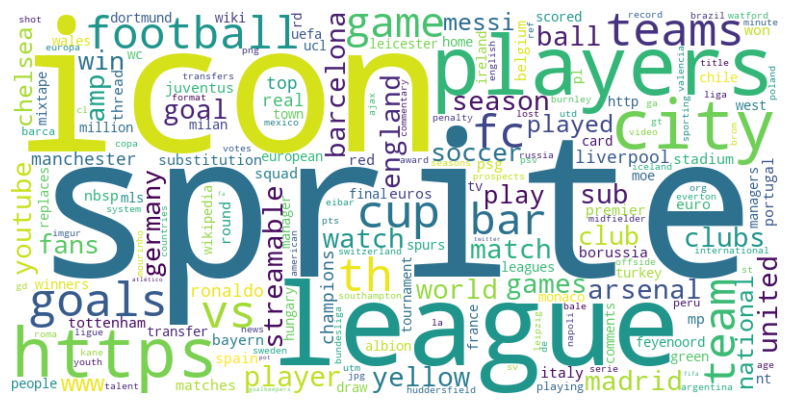

In [49]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Flatten the dictionary keywords and create a new column 'keyword_text'
soccer_df['keyword_text'] = soccer_df['keywords'].apply(lambda keywords: ' '.join(key for key in keywords.keys()))

# Use TfidfVectorizer to compute TF-IDF scores for keywords
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(soccer_df['keyword_text'])

# Get feature names (keywords)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Sum the TF-IDF scores across all documents to get a global score for each keyword
global_tfidf_scores = tfidf_matrix.sum(axis=0).A1

# Create a dictionary of keyword to TF-IDF score
keyword_tfidf_dict = dict(zip(feature_names, global_tfidf_scores))

# Create a WordCloud based on TF-IDF scores
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(keyword_tfidf_dict)

# Display the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

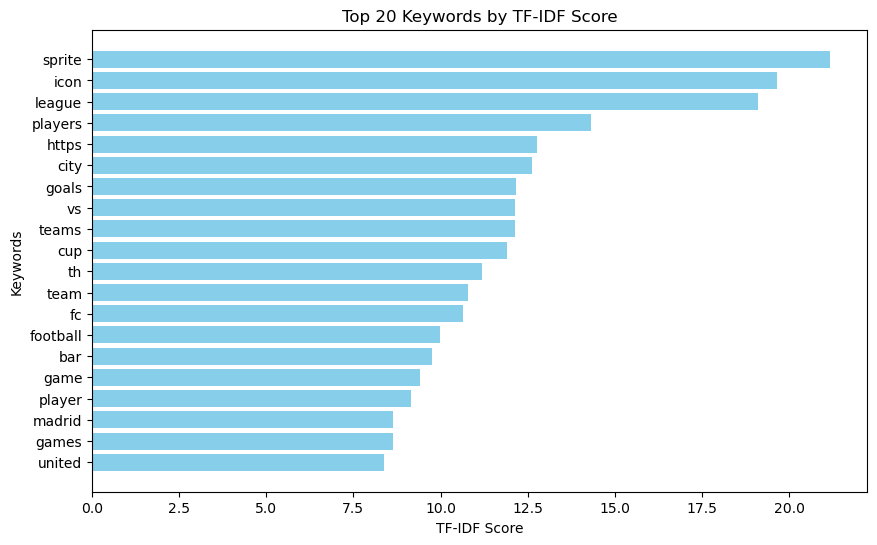

In [50]:
# Create a DataFrame with keywords and their corresponding TF-IDF scores
tfidf_data = pd.DataFrame({'Keyword': feature_names, 'TF-IDF Score': global_tfidf_scores})

# Sort the DataFrame by TF-IDF Score in descending order and get the top 20 keywords
top_20_keywords = tfidf_data.sort_values(by='TF-IDF Score', ascending=False).head(20)

# Plot a bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_20_keywords['Keyword'], top_20_keywords['TF-IDF Score'], color='skyblue')
plt.xlabel('TF-IDF Score')
plt.ylabel('Keywords')
plt.title('Top 20 Keywords by TF-IDF Score')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest score at the top
plt.show()

In [51]:
keywords_list

[{'fc': 0.578,
  'league': 0.371,
  'teams': 0.277,
  'play': 0.204,
  'national': 0.201},
 {'careers': 0.412,
  'nelson': 0.279,
  'winners': 0.219,
  'ability': 0.206,
  'pace': 0.188},
 {'defender': 0.367,
  'countries': 0.316,
  'aren': 0.262,
  'looks': 0.245,
  'marko': 0.216},
 {'bar': 0.718, 'green': 0.448, 'sprite': 0.448, 'grey': 0.219, 'fc': 0.089},
 {'referees': 0.311,
  'discussion': 0.24,
  'matches': 0.208,
  'match': 0.173,
  'gifs': 0.164},
 {'agent': 0.518,
  'fees': 0.449,
  'nuts': 0.25,
  'million': 0.228,
  'pogba': 0.226},
 {'yes': 0.671,
  'talented': 0.285,
  'wimbledon': 0.229,
  'half': 0.22,
  'goalkeeper': 0.196},
 {'transfermarkt': 0.313,
  'spell': 0.313,
  'hype': 0.3,
  'hyped': 0.217,
  'prospects': 0.211},
 {'united': 0.634,
  'torquay': 0.372,
  'town': 0.352,
  'join': 0.257,
  'national': 0.234},
 {'bbc': 0.409, 'football': 0.279, 'http': 0.269, 'sport': 0.266, 'eng': 0.22},
 {'votes': 0.35,
  'formation': 0.33,
  'forms': 0.327,
  'google': 0.261,

In [52]:
keyword_lists

[['fc', 'league', 'teams', 'play', 'national'],
 ['careers', 'nelson', 'winners', 'ability', 'pace'],
 ['defender', 'countries', 'aren', 'looks', 'marko'],
 ['bar', 'green', 'sprite', 'grey', 'fc'],
 ['referees', 'discussion', 'matches', 'match', 'gifs'],
 ['agent', 'fees', 'nuts', 'million', 'pogba'],
 ['yes', 'talented', 'wimbledon', 'half', 'goalkeeper'],
 ['transfermarkt', 'spell', 'hype', 'hyped', 'prospects'],
 ['united', 'torquay', 'town', 'join', 'national'],
 ['bbc', 'football', 'http', 'sport', 'eng'],
 ['votes', 'formation', 'forms', 'google', 'oblak'],
 ['david', 'fashion', 'business', 'beckham', 'victoria'],
 ['madrid', 'real', 'barcelona', 'cd', 'cf'],
 ['cruzeiro', 'mineiro', 'knocked', 'copa', 'semifinals'],
 ['premier', 'window', 'league', 'clubs', 'mike'],
 ['cup', 'fc', 'sv', 'dfb', 'pokal'],
 ['feyenoord', 'win', 'ajax', 'title', 'pm'],
 ['photos', 'photo', 'phone', 'found', 'box'],
 ['division', 'teams', 'top', 'divisions', 'play'],
 ['icon', 'valencia', 'sociedad'

In [53]:
from mlxtend.frequent_patterns import fpgrowth

# Set the minimum support threshold (e.g., 0.01)
min_support = 0.001
frequent_itemsets = fpgrowth(binary_matrix_df, min_support=min_support, use_colnames=True)

frequent_itemsets


,support,itemsets
0,0.064,(league)
1,0.036,(teams)
2,0.030,(fc)
3,0.014,(play)
4,0.014,(national)
...,...,...
26749,0.001,"(dropped, fc, gd, cf)"
26750,0.001,"(dropped, gd, cf, sprite)"
26751,0.001,"(dropped, fc, cf, sprite)"
26752,0.001,"(dropped, fc, gd, sprite)"


In [54]:
# Sort the frequent_itemsets DataFrame based on support in descending order
sorted_frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)

# Select the top five rows with highest support
top_five_itemsets = sorted_frequent_itemsets.head(5)

top_five_itemsets

,support,itemsets
15,0.071,(sprite)
0,0.064,(league)
89,0.063,(icon)
166,0.047,(players)
112,0.037,(city)


In [55]:
frequent_itemsets[['support']].describe()

,support
count,26754.000000
mean,0.001159
std,0.001344
min,0.001000
25%,0.001000
50%,0.001000
75%,0.001000
max,0.071000


In [56]:
# Set the minimum confidence threshold (e.g., 0.5)
min_confidence = 0.5

# Generate association rules
from mlxtend.frequent_patterns import association_rules

association_rules_df = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)

# Display the association rules
association_rules_df

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(players, teams)",(league),0.001,0.064,0.001,1.0,15.625000,0.000936,inf,0.936937
1,"(cup, fc)",(vs),0.002,0.035,0.001,0.5,14.285714,0.000930,1.93,0.931864
2,"(cup, vs)",(fc),0.001,0.030,0.001,1.0,33.333333,0.000970,inf,0.970971
3,"(fc, vs)",(cup),0.002,0.035,0.001,0.5,14.285714,0.000930,1.93,0.931864
4,"(fc, play)",(league),0.001,0.064,0.001,1.0,15.625000,0.000936,inf,0.936937
...,...,...,...,...,...,...,...,...,...,...
127787,"(gd, cf)","(dropped, fc, sprite)",0.001,0.001,0.001,1.0,1000.000000,0.000999,inf,1.000000
127788,"(dropped, sprite)","(fc, gd, cf)",0.001,0.001,0.001,1.0,1000.000000,0.000999,inf,1.000000
127789,"(gd, sprite)","(dropped, fc, cf)",0.001,0.001,0.001,1.0,1000.000000,0.000999,inf,1.000000
127790,"(dropped, gd)","(fc, cf, sprite)",0.001,0.001,0.001,1.0,1000.000000,0.000999,inf,1.000000


In [57]:
association_rules_df.sort_values('confidence', ascending = False, inplace = True)
association_rules_df.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(players, teams)",(league),0.001,0.064,0.001,1.0,15.625000,0.000936,inf,0.936937
82777,"(unbeaten, probability, game)",(deportivo),0.001,0.001,0.001,1.0,1000.000000,0.000999,inf,1.000000
82792,"(villarreal, deportivo)","(probability, game)",0.001,0.002,0.001,1.0,500.000000,0.000998,inf,0.998999
82791,"(deportivo, probability, game)",(villarreal),0.001,0.002,0.001,1.0,500.000000,0.000998,inf,0.998999
82790,"(villarreal, probability, game)",(deportivo),0.001,0.001,0.001,1.0,1000.000000,0.000999,inf,1.000000
82789,"(villarreal, deportivo, game)",(probability),0.001,0.002,0.001,1.0,500.000000,0.000998,inf,0.998999
82788,"(villarreal, deportivo, probability)",(game),0.001,0.027,0.001,1.0,37.037037,0.000973,inf,0.973974
82786,(deportivo),"(unbeaten, probability, game)",0.001,0.001,0.001,1.0,1000.000000,0.000999,inf,1.000000
82783,"(deportivo, game)","(unbeaten, probability)",0.001,0.001,0.001,1.0,1000.000000,0.000999,inf,1.000000
82782,"(deportivo, probability)","(unbeaten, game)",0.001,0.001,0.001,1.0,1000.000000,0.000999,inf,1.000000


In [58]:

# Select the 'snowboarding' category from the original DataFrame
snowboarding_df = dat[dat['category'] == 'snowboarding']

# Create a new DataFrame with only the specified columns
snowboarding_df = snowboarding_df[['text', 'category', 'cleansed_text', 'keywords']]

# Convert the 'keywords' column to a list
keywords_list_snowboarding = snowboarding_df['keywords'].tolist()

# Create a TransactionEncoder and fit_transform the data to get the binary matrix
te_snowboarding = TransactionEncoder()
binary_matrix_snowboarding = te_snowboarding.fit_transform([[key for key in keyword_dict.keys()] for keyword_dict in keywords_list_snowboarding])

# Create a new DataFrame from the binary matrix
binary_matrix_df_snowboarding = pd.DataFrame(binary_matrix_snowboarding, columns=te_snowboarding.columns_)

# Perform frequent itemset mining using FP-Growth algorithm
min_support = 0.001
frequent_itemsets_snowboarding = fpgrowth(binary_matrix_df_snowboarding, min_support=min_support, use_colnames=True)

# Generate association rules
min_confidence = 0.5
association_rules_df_snowboarding = association_rules(frequent_itemsets_snowboarding, metric="confidence", min_threshold=min_confidence)

# Display the association rules
association_rules_df_snowboarding.sort_values('confidence', ascending=False, inplace=True)
association_rules_df_snowboarding.head(10)




,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(creek, season)",(resorts),0.001,0.019,0.001,1.0,52.631579,0.000981,inf,0.981982
87142,"(living, native, hours)",(riding),0.001,0.025,0.001,1.0,40.000000,0.000975,inf,0.975976
87140,"(riding, living, hours)",(native),0.001,0.001,0.001,1.0,1000.000000,0.000999,inf,1.000000
87139,"(riding, living, native)",(hours),0.001,0.003,0.001,1.0,333.333333,0.000997,inf,0.997998
87138,(native),"(living, resort, hours)",0.001,0.001,0.001,1.0,1000.000000,0.000999,inf,1.000000
87136,"(native, hours)","(living, resort)",0.001,0.002,0.001,1.0,500.000000,0.000998,inf,0.998999
87135,"(resort, hours)","(living, native)",0.001,0.001,0.001,1.0,1000.000000,0.000999,inf,1.000000
87134,"(resort, native)","(living, hours)",0.001,0.001,0.001,1.0,1000.000000,0.000999,inf,1.000000
87133,"(living, hours)","(resort, native)",0.001,0.001,0.001,1.0,1000.000000,0.000999,inf,1.000000
87132,"(living, native)","(resort, hours)",0.001,0.001,0.001,1.0,1000.000000,0.000999,inf,1.000000


In [59]:
# Select the 'triathlon' category from the original DataFrame
triathlon_df = dat[dat['category'] == 'triathlon']

# Create a new DataFrame with only the specified columns
triathlon_df = triathlon_df[['text', 'category', 'cleansed_text', 'keywords']]

# Convert the 'keywords' column to a list
keywords_list_triathlon = triathlon_df['keywords'].tolist()

# Create a TransactionEncoder and fit_transform the data to get the binary matrix
te_triathlon = TransactionEncoder()
binary_matrix_triathlon = te_triathlon.fit_transform([[key for key in keyword_dict.keys()] for keyword_dict in keywords_list_triathlon])

# Create a new DataFrame from the binary matrix
binary_matrix_df_triathlon = pd.DataFrame(binary_matrix_triathlon, columns=te_triathlon.columns_)

# Perform frequent itemset mining using FP-Growth algorithm
min_support = 0.001
frequent_itemsets_triathlon = fpgrowth(binary_matrix_df_triathlon, min_support=min_support, use_colnames=True)

# Generate association rules
min_confidence = 0.5
association_rules_df_triathlon = association_rules(frequent_itemsets_triathlon, metric="confidence", min_threshold=min_confidence)

# Display the association rules
association_rules_df_triathlon.sort_values('confidence', ascending=False, inplace=True)
association_rules_df_triathlon


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
64095,"(diego, san)","(rookie, shell)",0.001,0.001,0.001,1.0,1000.000000,0.000999,inf,1.000000
83010,"(pedals, slide, clipless, shoes)",(straps),0.001,0.003,0.001,1.0,333.333333,0.000997,inf,0.997998
83023,"(pedals, straps, shoes)","(slide, clipless)",0.001,0.001,0.001,1.0,1000.000000,0.000999,inf,1.000000
83022,"(straps, clipless, shoes)","(pedals, slide)",0.001,0.001,0.001,1.0,1000.000000,0.000999,inf,1.000000
83020,"(pedals, straps, clipless)","(slide, shoes)",0.001,0.001,0.001,1.0,1000.000000,0.000999,inf,1.000000
...,...,...,...,...,...,...,...,...,...,...
30278,(sale),"(nike, card)",0.002,0.001,0.001,0.5,500.000000,0.000998,1.998,1.000000
116322,(maryland),"(vibe, race)",0.002,0.001,0.001,0.5,500.000000,0.000998,1.998,1.000000
94053,(beginning),"(race, distance, training)",0.002,0.001,0.001,0.5,500.000000,0.000998,1.998,1.000000
94052,"(beginning, race)","(distance, training)",0.002,0.002,0.001,0.5,250.000000,0.000996,1.996,0.997996


In [60]:
# Select the 'judo' category from the original DataFrame
judo_df = dat[dat['category'] == 'judo']

# Create a new DataFrame with only the specified columns
judo_df = judo_df[['text', 'category', 'cleansed_text', 'keywords']]

# Convert the 'keywords' column to a list
keywords_list_judo = judo_df['keywords'].tolist()

# Create a TransactionEncoder and fit_transform the data to get the binary matrix
te_judo = TransactionEncoder()
binary_matrix_judo = te_judo.fit_transform([[key for key in keyword_dict.keys()] for keyword_dict in keywords_list_judo])

# Create a new DataFrame from the binary matrix
binary_matrix_df_judo = pd.DataFrame(binary_matrix_judo, columns=te_judo.columns_)

# Perform frequent itemset mining using FP-Growth algorithm
min_support = 0.001
frequent_itemsets_judo = fpgrowth(binary_matrix_df_judo, min_support=min_support, use_colnames=True)

# Generate association rules
min_confidence = 0.5
association_rules_df_judo = association_rules(frequent_itemsets_judo, metric="confidence", min_threshold=min_confidence)

# Display the association rules
association_rules_df_judo.sort_values('confidence', ascending=False, inplace=True)
association_rules_df_judo.head(10)



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
65036,"(coaches, win)",(home),0.001,0.003,0.001,1.0,333.333333,0.000997,inf,0.997998
75367,"(fake, opponent, attacks)",(tani),0.001,0.004,0.001,1.0,250.000000,0.000996,inf,0.996997
75378,"(tani, throw)",(fake),0.001,0.002,0.001,1.0,500.000000,0.000998,inf,0.998999
75377,"(fake, throw)",(tani),0.001,0.004,0.001,1.0,250.000000,0.000996,inf,0.996997
75376,"(fake, tani)",(throw),0.001,0.036,0.001,1.0,27.777778,0.000964,inf,0.964965
118164,"(president, change)","(strongly, fighter)",0.001,0.001,0.001,1.0,1000.000000,0.000999,inf,1.000000
75374,"(opponent, attacks)","(fake, tani)",0.001,0.001,0.001,1.0,1000.000000,0.000999,inf,1.000000
75373,"(attacks, tani)","(fake, opponent)",0.001,0.002,0.001,1.0,500.000000,0.000998,inf,0.998999
75372,"(opponent, tani)","(fake, attacks)",0.001,0.001,0.001,1.0,1000.000000,0.000999,inf,1.000000
75371,"(fake, attacks)","(opponent, tani)",0.001,0.001,0.001,1.0,1000.000000,0.000999,inf,1.000000


In [61]:
# Select the 'surfing' category from the original DataFrame
surfing_df = dat[dat['category'] == 'surfing']

# Create a new DataFrame with only the specified columns
surfing_df = surfing_df[['text', 'category', 'cleansed_text', 'keywords']]

# Convert the 'keywords' column to a list
keywords_list_surfing = surfing_df['keywords'].tolist()

# Create a TransactionEncoder and fit_transform the data to get the binary matrix
te_surfing = TransactionEncoder()
binary_matrix_surfing = te_surfing.fit_transform([[key for key in keyword_dict.keys()] for keyword_dict in keywords_list_surfing])

# Create a new DataFrame from the binary matrix
binary_matrix_df_surfing = pd.DataFrame(binary_matrix_surfing, columns=te_surfing.columns_)

# Perform frequent itemset mining using FP-Growth algorithm
min_support = 0.001
frequent_itemsets_surfing = fpgrowth(binary_matrix_df_surfing, min_support=min_support, use_colnames=True)

# Generate association rules
min_confidence = 0.5
association_rules_df_surfing = association_rules(frequent_itemsets_surfing, metric="confidence", min_threshold=min_confidence)

# Display the association rules
association_rules_df_surfing.sort_values('confidence', ascending=False, inplace=True)
association_rules_df_surfing.head(10)



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
66375,"(surfing, fine, wave, pretty)",(basketball),0.001,0.001,0.001,1.0,1000.0,0.000999,inf,1.000000
77160,"(waves, dig)",(tips),0.001,0.004,0.001,1.0,250.0,0.000996,inf,0.996997
77130,"(earlier, personal, cape)","(surfing, nj)",0.001,0.001,0.001,1.0,1000.0,0.000999,inf,1.000000
77129,"(earlier, nj, cape)","(surfing, personal)",0.001,0.001,0.001,1.0,1000.0,0.000999,inf,1.000000
77128,"(earlier, nj, personal)","(surfing, cape)",0.001,0.001,0.001,1.0,1000.0,0.000999,inf,1.000000
77127,"(surfing, cape, personal)","(earlier, nj)",0.001,0.001,0.001,1.0,1000.0,0.000999,inf,1.000000
77126,"(surfing, cape, nj)","(earlier, personal)",0.001,0.001,0.001,1.0,1000.0,0.000999,inf,1.000000
77125,"(surfing, nj, personal)","(earlier, cape)",0.001,0.001,0.001,1.0,1000.0,0.000999,inf,1.000000
77124,"(surfing, earlier, cape)","(nj, personal)",0.001,0.001,0.001,1.0,1000.0,0.000999,inf,1.000000
77123,"(surfing, earlier, personal)","(cape, nj)",0.001,0.001,0.001,1.0,1000.0,0.000999,inf,1.000000


# Shan Jing's Problem2

## 3. Classification Modeling

### 3.1 Sample the data

In [62]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Define the text preprocessing function
def preprocess_text(text):
    # Remove special characters and digits
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    
    # Convert text to lowercase
    text = text.lower()
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = list(get_stop_words("stopwords.txt"))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    
    # Join the tokens back into a single string
    preprocessed_text = ' '.join(filtered_tokens)
    
    return preprocessed_text

# Combine all categories into a single DataFrame
combined_df = pd.concat([soccer_df, snowboarding_df, triathlon_df, surfing_df, judo_df], ignore_index=True)


# Preprocess the text data using the defined function
combined_df['cleansed_text'] = combined_df['cleansed_text'].apply(preprocess_text)

# Split data into features (X) and labels (y)
X = combined_df['cleansed_text']
y = combined_df['category']

# Convert paragraphs into numerical features using TF-IDF
vectorizer = TfidfVectorizer(max_features=7000)  
X_tfidf = vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Accuracy: 0.975
Classification Report:
              precision    recall  f1-score   support

        judo       0.99      0.96      0.98       192
snowboarding       0.94      0.98      0.96       190
      soccer       0.96      1.00      0.98       216
     surfing       0.99      0.96      0.97       210
   triathlon       0.99      0.96      0.98       192

    accuracy                           0.97      1000
   macro avg       0.98      0.97      0.97      1000
weighted avg       0.98      0.97      0.98      1000



In [63]:
y_pred

array(['snowboarding', 'triathlon', 'triathlon', 'snowboarding', 'soccer',
       'soccer', 'soccer', 'triathlon', 'triathlon', 'snowboarding',
       'triathlon', 'soccer', 'soccer', 'soccer', 'surfing', 'surfing',
       'snowboarding', 'surfing', 'snowboarding', 'snowboarding',
       'soccer', 'surfing', 'snowboarding', 'soccer', 'judo', 'soccer',
       'judo', 'soccer', 'judo', 'soccer', 'snowboarding', 'soccer',
       'judo', 'judo', 'snowboarding', 'triathlon', 'surfing', 'judo',
       'judo', 'triathlon', 'surfing', 'judo', 'soccer', 'soccer',
       'soccer', 'surfing', 'surfing', 'judo', 'surfing', 'triathlon',
       'judo', 'judo', 'triathlon', 'triathlon', 'soccer', 'surfing',
       'snowboarding', 'soccer', 'snowboarding', 'triathlon', 'triathlon',
       'judo', 'judo', 'surfing', 'soccer', 'triathlon', 'surfing',
       'triathlon', 'surfing', 'judo', 'snowboarding', 'soccer', 'soccer',
       'soccer', 'snowboarding', 'triathlon', 'soccer', 'triathlon',
       'tri

### 3.2 Build the Model(s)

In [64]:
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer

# Save the trained model to a file
model_filename = 'trained_model.pkl'
joblib.dump(model, model_filename)

# Load the trained model from the file
loaded_model = joblib.load(model_filename)

# Create a new instance of the vectorizer with the same settings used during training
loaded_vectorizer = TfidfVectorizer(max_features=7000) 
loaded_vectorizer.fit(X)

# Text to be predicted
new_text = "Amidst a unique athletic challenge, diverse individuals converge to tackle a demanding fusion of activities. The event gracefully encompasses aquatic exploration, pedal-powered propulsion, and foot-powered endurance. Beginning with aquatic navigation, athletes adapt to dynamic currents. A transition then leads to pedal-powered momentum, navigating landscapes. The journey climaxes with a foot-powered trial, a true test of perseverance. Beyond a mere competition, this event exudes celebration of human tenacity and triumph."

# Preprocess the new text using the defined function
preprocessed_text = preprocess_text(new_text)

# Convert the preprocessed text into numerical features using the loaded vectorizer
new_text_tfidf = loaded_vectorizer.transform([preprocessed_text])

# Make prediction on the new text using the loaded model
predicted_category = loaded_model.predict(new_text_tfidf)[0]

print("Predicted Category:", predicted_category)




Predicted Category: triathlon


### 3.3 Evaluate and Improve the Model(s)

In [65]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Define the text preprocessing function
def preprocess_text(text):
    # Remove special characters and digits
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    
    # Convert text to lowercase
    text = text.lower()
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords
    #stop_words = set(stopwords.words('english'))
    stop_words = list(get_stop_words("stopwords.txt"))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    
    # Join the tokens back into a single string
    preprocessed_text = ' '.join(filtered_tokens)
    
    return preprocessed_text

# Combine all categories into a single DataFrame
combined_df = pd.concat([soccer_df, snowboarding_df, triathlon_df, surfing_df, judo_df], ignore_index=True)

# Preprocess the text data using the defined function
combined_df['cleansed_text'] = combined_df['cleansed_text'].apply(preprocess_text)

# Split data into features (X) and labels (y)
X = combined_df['cleansed_text']
y = combined_df['category']

# Convert paragraphs into numerical features using TF-IDF
vectorizer = TfidfVectorizer(max_features=7000)
X_tfidf = vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.975
Classification Report:
              precision    recall  f1-score   support

        judo       0.99      0.96      0.98       192
snowboarding       0.94      0.98      0.96       190
      soccer       0.96      1.00      0.98       216
     surfing       0.99      0.96      0.97       210
   triathlon       0.99      0.96      0.98       192

    accuracy                           0.97      1000
   macro avg       0.98      0.97      0.97      1000
weighted avg       0.98      0.97      0.98      1000

Confusion Matrix:
[[185   1   5   0   1]
 [  1 187   1   1   0]
 [  0   0 216   0   0]
 [  0   6   2 202   0]
 [  1   4   0   2 185]]


In [66]:
from sklearn.model_selection import GridSearchCV

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],             # Regularization type
    'solver': ['liblinear']              # Solver for logistic regression
}

# Create a Logistic Regression model
model = LogisticRegression()

# Initialize GridSearchCV with the parameter grid and model
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)

# Perform hyperparameter tuning on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score from the grid search
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)


# Make predictions on the test set using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the best model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Best Model Accuracy:", accuracy)
print("Best Model Classification Report:")
print(report)
print("Best Model Confusion Matrix:")
print(conf_matrix)


Best Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Best Model Accuracy: 0.98
Best Model Classification Report:
              precision    recall  f1-score   support

        judo       0.99      0.97      0.98       192
snowboarding       0.96      0.98      0.97       190
      soccer       0.97      1.00      0.99       216
     surfing       0.98      0.97      0.98       210
   triathlon       0.99      0.97      0.98       192

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000

Best Model Confusion Matrix:
[[187   0   4   0   1]
 [  1 187   1   1   0]
 [  0   0 216   0   0]
 [  0   5   1 204   0]
 [  0   3   0   3 186]]


In [67]:
# from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model with the best parameters
best_model = LogisticRegression(C=10, penalty='l2', solver='liblinear')

# Fit the best model to the entire training data
best_model.fit(X_train, y_train)

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the best model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Best Model Accuracy:", accuracy)
print("Best Model Classification Report:")
print(report)
print("Best Model Confusion Matrix:")
print(conf_matrix)


Best Model Accuracy: 0.98
Best Model Classification Report:
              precision    recall  f1-score   support

        judo       0.99      0.97      0.98       192
snowboarding       0.96      0.98      0.97       190
      soccer       0.97      1.00      0.99       216
     surfing       0.98      0.97      0.98       210
   triathlon       0.99      0.97      0.98       192

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000

Best Model Confusion Matrix:
[[187   0   4   0   1]
 [  1 187   1   1   0]
 [  0   0 216   0   0]
 [  0   5   1 204   0]
 [  0   3   0   3 186]]


In [68]:
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer

# Save the trained model to a file
best_model_filename = 'best_trained_model.pkl'
joblib.dump(best_model, best_model_filename)

# Load the trained model from the file
best_loaded_model = joblib.load(best_model_filename)

# Create a new instance of the vectorizer with the same settings used during training
best_loaded_vectorizer = TfidfVectorizer(max_features=7000) 
best_loaded_vectorizer.fit(X)

# Text to be predicted
new_text = "1 v 1 come, sparring"

# Preprocess the new text using the defined function
preprocessed_text = preprocess_text(new_text)

# Convert the preprocessed text into numerical features using the loaded vectorizer
new_text_tfidf = best_loaded_vectorizer.transform([preprocessed_text])

# Make prediction on the new text using the loaded model
predicted_category = best_loaded_model.predict(new_text_tfidf)[0]

print("Predicted Category:", predicted_category)

Predicted Category: judo


# Isacc's Problem2

## 3. Classification Modeling

### 3.1 Sample the data

In [69]:
from sklearn.tree import DecisionTreeClassifier
dat["text"] = text_all

In [70]:
test_df = dat[["text", "category"]]

In [71]:
test_df

,text,category
0,this is just an hypothesis on how i imagine an...,soccer
1,hey community i want to get your opinion on wh...,snowboarding
2,i have a roubaix road bike with aero bars and ...,triathlon
3,out of the u world cup winners top prospects w...,soccer
4,a while ago i quit judo and since then i ve da...,judo
...,...,...
4995,hey do you guys have any recommendations for h...,surfing
4996,ft manchester united wigan athletic fellaini ...,soccer
4997,sprite p fc barcelona season w d l gd points ...,soccer
4998,bluf riding a combo of an longboard and a big ...,surfing


<Axes: xlabel='category'>

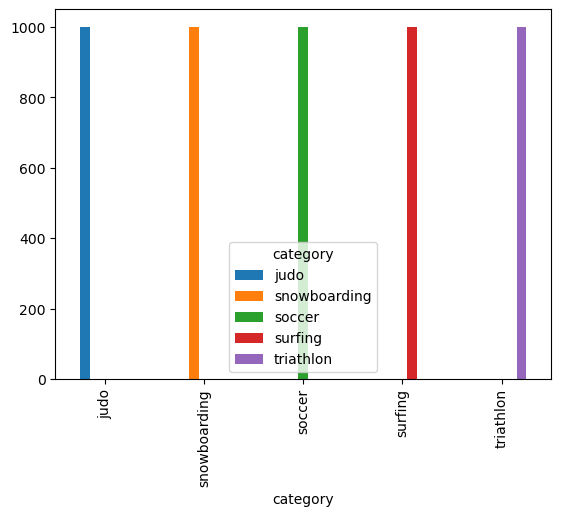

In [72]:
test_df.groupby("category").category.value_counts().unstack(0).plot.bar()

In [73]:
X = text_counts.toarray()
y = dat['category'].map( {'soccer': 0, 'snowboarding': 1, 'triathlon': 2, 'judo': 3, 'surfing': 4} ).astype(int)

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [76]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.883


### 3.3 Evaluate and Improve the Model(s)

In [77]:
y_pred = model.predict(X_test)

print(accuracy_score(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred, labels =[0, 1]))
print("\n")
print(classification_report(y_test, y_pred))

0.883


[[195  10]
 [  6 165]]


              precision    recall  f1-score   support

           0       0.94      0.93      0.93       210
           1       0.79      0.83      0.81       199
           2       0.89      0.91      0.90       192
           3       0.92      0.88      0.90       199
           4       0.88      0.86      0.87       200

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.88      0.88      0.88      1000



# Natalie's Problem2

## 3. Classification Modeling

### 3.1 Sample the data

### 3.2 Build the Model(s)

In [78]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC 
from sklearn.metrics import accuracy_score, classification_report
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')



combined_df = pd.concat([soccer_df, snowboarding_df, triathlon_df, surfing_df, judo_df], ignore_index=True)
# Define the text preprocessing function
def _pre_process(text):
    # Remove special characters and digits
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    
    # Convert text to lowercase
    text = text.lower()
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))  
    filtered_tokens = [word for word in tokens if word not in stop_words]
    
    # Join the tokens back into a single string
    preprocessed_text = ' '.join(filtered_tokens)
    
    return preprocessed_text


combined_df = pd.concat([soccer_df, snowboarding_df, triathlon_df, surfing_df, judo_df], ignore_index=True)

combined_df['cleansed_text'] = combined_df['cleansed_text'].apply(_pre_process)


X = combined_df['cleansed_text']
y = combined_df['category']


vectorizer = TfidfVectorizer(max_features=5000)  
X_tfidf = vectorizer.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)


model = LinearSVC()  
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print(report)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\soosh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy: 0.9673333333333334
              precision    recall  f1-score   support

        judo       0.99      0.98      0.98       290
snowboarding       0.93      0.96      0.95       309
      soccer       0.98      0.99      0.98       316
     surfing       0.97      0.95      0.96       301
   triathlon       0.98      0.95      0.97       284

    accuracy                           0.97      1500
   macro avg       0.97      0.97      0.97      1500
weighted avg       0.97      0.97      0.97      1500



### 3.3 Evaluate and Improve the Model(s)

# Ervin Problem2

## 3. Classification Modeling

### 3.2 Build the Model(s)

In [79]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

preprocessed_txt = dat['text'].apply(pre_process)
vectorizer.fit(preprocessed_txt)

TfidfVectorizer()

In [81]:
#X = dat.drop('category', axis =1).values
X = vectorizer.transform(preprocessed_txt)
y = dat['category'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:
from sklearn.preprocessing import LabelEncoder

In [83]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_train)

In [84]:
model = xgb.XGBClassifier(
    objective="multi:softmax",  # For multiclass classification
    num_class=5,      # Number of classes in your target
    max_depth=6,                # Maximum depth of trees
    learning_rate=0.1,          # Learning rate
    n_estimators=100            # Number of boosting rounds (trees)
)
model.fit(X_train, y_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_class=5,
              num_parallel_tree=None, objective='multi:softmax', ...)

### 3.3 Evaluate and Improve the Model(s)

In [85]:
#Calculate accuracy

y_pred = model.predict(X_test)

y_test_encoded = label_encoder.fit_transform(y_test)

accuracy = accuracy_score(y_test_encoded, y_pred)

print(f"Accuracy: {accuracy}")

Accuracy: 0.929


In [86]:
#Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

conf_matrix = confusion_matrix(y_test_encoded, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[182   8   5   0   4]
 [  1 183   4  10   1]
 [  1   3 204   0   2]
 [  0  19   2 175   4]
 [  1   3   1   2 185]]


In [87]:
# Calculate classification report
class_report = classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

        judo       0.98      0.91      0.95       199
snowboarding       0.85      0.92      0.88       199
      soccer       0.94      0.97      0.96       210
     surfing       0.94      0.88      0.90       200
   triathlon       0.94      0.96      0.95       192

    accuracy                           0.93      1000
   macro avg       0.93      0.93      0.93      1000
weighted avg       0.93      0.93      0.93      1000



In [88]:
input_text = "In the realm of martial arts, there exists a discipline rooted in Japan's history, emphasizing the skillful interplay of balance, technique, and force. Practitioners engage in close combat, aiming to use an opponent's energy to their advantage while executing throws and holds that demand both precision and timing. Beyond its physical aspect, this art nurtures mental resilience, teaching practitioners to adapt to unexpected situations with grace and determination."
preprocessed_text = pre_process(input_text)
input_tfidf = vectorizer.transform([preprocessed_text])
predicted_encoded_label = model.predict(input_tfidf)
predicted_encoded_label = predicted_encoded_label.reshape(-1)
predicted_category = label_encoder.inverse_transform(predicted_encoded_label)

print(f"Predicted Category: {predicted_category[0]}")

Predicted Category: judo


# Joshua's Problem2

## 3. Classification Modeling

### 3.1 Sample the data

### 3.2 Build the Model(s)

In [91]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re



combined_df = pd.concat([soccer_df, snowboarding_df, triathlon_df, surfing_df, judo_df], ignore_index=True)


def cleanse_text(text):
    
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    
    
    text = text.lower()
    
   
    tokens = word_tokenize(text)
    
   
    stop_words = list(get_stop_words("stopwords.txt"))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    
    preprocessed_text = ' '.join(filtered_tokens)
    
    return preprocessed_text


combined_df['cleansed_text'] = combined_df['cleansed_text'].apply(cleanse_text)

X = combined_df['cleansed_text']
y = combined_df['category']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


vectorizer = TfidfVectorizer(max_features=5000)


X_train_tfidf = vectorizer.fit_transform(X_train)


rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)


rf_classifier.fit(X_train_tfidf, y_train)


X_test_tfidf = vectorizer.transform(X_test)


y_pred = rf_classifier.predict(X_test_tfidf)


accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Accuracy: 0.958
Classification Report:
              precision    recall  f1-score   support

        judo       0.99      0.95      0.97       192
snowboarding       0.89      0.95      0.92       190
      soccer       0.96      0.99      0.98       216
     surfing       0.96      0.95      0.96       210
   triathlon       0.99      0.94      0.97       192

    accuracy                           0.96      1000
   macro avg       0.96      0.96      0.96      1000
weighted avg       0.96      0.96      0.96      1000



### 3.3 Evaluate and Improve the Model(s)

In [92]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
from sklearn.model_selection import GridSearchCV


def cleanse_text(text):
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.lower()
    tokens = word_tokenize(text)
    stop_words = list(get_stop_words("stopwords.txt"))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    preprocessed_text = ' '.join(filtered_tokens)
    return preprocessed_text


combined_df = pd.concat([soccer_df, snowboarding_df, triathlon_df, surfing_df, judo_df], ignore_index=True)


combined_df['cleansed_text'] = combined_df['cleansed_text'].apply(cleanse_text)

X = combined_df['cleansed_text']
y = combined_df['category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)


param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=3,
                           n_jobs=-1)

grid_search.fit(X_train_tfidf, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Use the best estimator to make predictions
X_test_tfidf = vectorizer.transform(X_test)
y_pred = best_estimator.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Best Parameters:", best_params)
print("Accuracy:", accuracy)
print(report)


Best Parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}
Accuracy: 0.963
              precision    recall  f1-score   support

        judo       0.99      0.96      0.98       192
snowboarding       0.89      0.96      0.92       190
      soccer       0.97      0.99      0.98       216
     surfing       0.97      0.96      0.96       210
   triathlon       1.00      0.94      0.97       192

    accuracy                           0.96      1000
   macro avg       0.96      0.96      0.96      1000
weighted avg       0.96      0.96      0.96      1000

